In [246]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Loading important packages

In [247]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

## Importing specific files for respetive positive, negative, and neutral dataset  

In [248]:
posset = pd.read_csv('/content/gdrive/MyDrive/dataset_patent/2020_pos.csv')
negset = pd.read_csv('/content/gdrive/MyDrive/dataset_patent/2020_neg.csv')
neutset = pd.read_csv('/content/gdrive/MyDrive/dataset_patent/2020_neutral.csv')

### Checking the the first few columns of the respective dataset

In [249]:
# Positive tag 
posset.head()  

,Unnamed: 0,Unnamed: 0.1,publication_number,patent_title,appl_type,positive_text
0,0,0,USRE048321E1,Rolling bearing and its packaging method,reissue,"['<p id=""p-0014"" num=""0013"">According to the p..."
1,1,1,US10842211B2,Heat-retaining article,utility,"['<p id=""p-0010"" num=""0009"">The heat retaining..."
2,2,2,US10842310B2,Cooking apparatus,utility,"['<p id=""p-0011"" num=""0010"">An aspect of the p..."
3,3,3,US10842344B2,Dishwasher and control method thereof,utility,"['<p id=""p-0032"" num=""0031"">The present invent..."
4,4,4,US10842356B2,Optical connector and medical equipment,utility,"['<p id=""p-0025"" num=""0024"">In the optical con..."


In [250]:
# negative tag
negset.head()

,Unnamed: 0,Unnamed: 0.1,publication_number,patent_title,appl_type,negative_text
0,0,0,US15763849,Emitter and drip irrigation tube,utility,"['<p id=""p-0009"" num=""0008"">In the emitter dis..."
1,1,1,US15550873,Method for cultivating oysters on land,utility,"['<p id=""p-0007"" num=""0009"">However, the culti..."
2,2,2,US16075448,Oxygen-mixing cosmetic container,utility,"['<p id=""p-0015"" num=""0014"">Accordingly, the p..."
3,3,3,US15545655,Polarization sensitive optical coherence tomog...,utility,"['<p id=""p-0009"" num=""0008"">An object of the p..."
4,4,4,US15764330,Viewer emotion determination apparatus that el...,utility,"['<p id=""p-0008"" num=""0007"">Meanwhile, similar..."


In [251]:
#neutral tag
neutset.head()

,Unnamed: 0,Unnamed: 0.1,publication_number,patent_title,appl_type,neutral_text
0,0,0,US15763849,Emitter and drip irrigation tube,utility,"['<p id=""p-0012"" num=""0011"">In addition, to so..."
1,1,1,US15550873,Method for cultivating oysters on land,utility,"['<p id=""p-0016"" num=""0018"">The period for gro..."
2,2,2,US15764330,Viewer emotion determination apparatus that el...,utility,"['<p id=""p-0026"" num=""0025"">A third aspect of ..."
3,3,3,US16227359,"X-ray device, control device and control metho...",utility,"['<p id=""p-0037"" num=""0036"">According to the c..."
4,4,4,US15317753,"α-Gel-intermediate composition, and production...",utility,"['<p id=""p-0027"" num=""0032"">The above-describe..."


In [252]:
def dropUnnamedIndex(df):
  df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [253]:
#dropping unnnamed index 
dropUnnamedIndex(posset)
dropUnnamedIndex(negset)
dropUnnamedIndex(neutset)

In [254]:
# Assigning a counter starting form 1
posset.index = range(1, len(posset)+1)
negset.index = range(1, len(negset)+1)
neutset.index = range(1, len(neutset)+1)

In [255]:
posset.head()

,publication_number,patent_title,appl_type,positive_text
1,USRE048321E1,Rolling bearing and its packaging method,reissue,"['<p id=""p-0014"" num=""0013"">According to the p..."
2,US10842211B2,Heat-retaining article,utility,"['<p id=""p-0010"" num=""0009"">The heat retaining..."
3,US10842310B2,Cooking apparatus,utility,"['<p id=""p-0011"" num=""0010"">An aspect of the p..."
4,US10842344B2,Dishwasher and control method thereof,utility,"['<p id=""p-0032"" num=""0031"">The present invent..."
5,US10842356B2,Optical connector and medical equipment,utility,"['<p id=""p-0025"" num=""0024"">In the optical con..."


#### Total applications count by category

In [256]:
# Counting number of applicaiton based on the applicaiton type in positive labels
gb_app_po = posset.groupby(['appl_type']).size().reset_index(name='total')
gb_app_po.head()

,appl_type,total
0,reissue,7
1,utility,8595


In [257]:
# Counting number of applicaiton based on the applicaiton type in negative labels
gb_app_ne = negset.groupby(['appl_type']).size().reset_index(name='total')
gb_app_ne.head()

,appl_type,total
0,reissue,15
1,utility,14675


In [258]:
# Counting a number of applicaiton based on the applicaiton type in neutral labels  # Edited 
gb_app_neut = neutset.groupby(['appl_type']).size().reset_index(name='total')
gb_app_neut.head()

,appl_type,total
0,reissue,3
1,utility,8142


#### Counting lengths and number of words for application title 

In [259]:
# Counting a total number of characters in the tilte
posset['title_lenght'] = posset['patent_title'].str.len()
negset['title_lenght'] = negset['patent_title'].str.len()
neutset['title_lenght'] = neutset['patent_title'].str.len()


In [260]:
# Counting a total number of words in the title
posset['total_words_in_title'] = posset['patent_title'].str.count(' ') + 1
negset['total_words_in_title'] = negset['patent_title'].str.count(' ') + 1
neutset['total_words_in_title'] = neutset['patent_title'].str.count(' ') + 1


In [262]:
# Checking the text for the field
neutset['neutral_text'][1]

'[\'<p id="p-0012" num="0011">In addition, to solve the above-mentioned problems, a drip irrigation tube according to embodiments of the present invention includes: a tube including a discharging port for discharging irrigation liquid; and the emitter according to claim <b>1</b> or <b>2</b> that is joined on an inner wall surface of the tube at a position corresponding to the discharging port.</p>\', \'<p id="p-0011" num="0010">To solve the above-mentioned problems, an emitter according to embodiments of the present invention is configured to be joined on an inner wall surface of a tube for carrying irrigation liquid at a position corresponding to a discharging port that communicates between inside and outside of the tube, the emitter being configured to quantitatively discharge the irrigation liquid in the tube from the discharging port to the outside of the tube, the emitter including: an intake part for intake of the irrigation liquid; a discharging part configured to be disposed to

**NOTE**: *For the text above, the tag starting form \<p> is indicating paragrapgh.*

##### Counting total number of paragraphs and cleaning text 

How many pararagraphs are there for respective application ?

In [263]:
# A function that will calculate total number of paragraphs in a respective patent using RegEx

def countPara(text):
  return len(re.findall(r"\W\w\s\w{2}\W{2}\w\W\d{4}\W\s\w{3}\W{2}\d{4}\W{2}",text))

In [264]:
# Creating new coulumn by applying countPara function to the neutral_text OR negative_text OR positive_text column

posset['total_paragraph'] = posset['positive_text'].apply(lambda x: countPara(x))
negset['total_paragraph'] = negset['negative_text'].apply(lambda x: countPara(x))
neutset['total_paragraph'] = neutset['neutral_text'].apply(lambda x: countPara(x))

How our dataset will look a like after cleaning tags?

In [265]:
# Remove html tags from text description using RegEx

def rmTag(text):
  return re.sub(r"<.+?>","",text)

In [266]:
# Creating new column by applying rmTag function to the neutral_text OR negative_text OR positive_text column

posset['clean_pos_tex'] = posset['positive_text'].apply(lambda x: rmTag(x))
negset['clean_neg_tex'] = negset['negative_text'].apply(lambda x: rmTag(x))
neutset['clean_neut_tex'] = neutset['neutral_text'].apply(lambda x: rmTag(x))

How many of words are contained within paragraph for respective patent ?

In [267]:
# Counting total number of words in text desciption 

posset['total_words_pos_text'] = posset['clean_pos_tex'].str.count(' ') + 1
negset['total_words_neg_text'] = negset['clean_neg_tex'].str.count(' ') + 1
neutset['total_words_neut_text'] = neutset['clean_neut_tex'].str.count(' ') + 1

In [268]:
posset.head()

,publication_number,patent_title,appl_type,positive_text,title_lenght,total_words_in_title,total_paragraph,clean_pos_tex,total_words_pos_text
1,USRE048321E1,Rolling bearing and its packaging method,reissue,"['<p id=""p-0014"" num=""0013"">According to the p...",40,6,1,"['According to the present invention, because ...",76
2,US10842211B2,Heat-retaining article,utility,"['<p id=""p-0010"" num=""0009"">The heat retaining...",22,2,1,['The heat retaining article of the invention ...,12
3,US10842310B2,Cooking apparatus,utility,"['<p id=""p-0011"" num=""0010"">An aspect of the p...",17,2,1,['An aspect of the present invention brings ab...,33
4,US10842344B2,Dishwasher and control method thereof,utility,"['<p id=""p-0032"" num=""0031"">The present invent...",37,5,4,['The present invention has the effect of prov...,186
5,US10842356B2,Optical connector and medical equipment,utility,"['<p id=""p-0025"" num=""0024"">In the optical con...",39,5,3,['In the optical connector according to the pr...,111


#### Let's check the total paragraph and their counts for all dataset

In [269]:
gbp = posset.groupby(['total_paragraph']).size().reset_index(name='counts')
gbp.head()

,total_paragraph,counts
0,0,10
1,1,6570
2,2,1135
3,3,301
4,4,173


### NOTE: 
From the table above, specifically total paragraph 0 makes us to look into dataset further  

In [270]:
# Retriving the applications where paragraph count was showing 0 

posset[posset['total_paragraph']==0]

,publication_number,patent_title,appl_type,positive_text,title_lenght,total_words_in_title,total_paragraph,clean_pos_tex,total_words_pos_text
649,US10854975B2,"Antenna unit, multi-array antenna system and b...",utility,[],65,9,0,[],1
1860,US10629997B2,Radiating integrated antenna unit and multi-ar...,utility,[],65,9,0,[],1
1900,US10631418B2,LED display screen with protective devices,utility,[],42,6,0,[],1
2861,US10753351B2,Air inflating device and tire repair machine c...,utility,[],60,9,0,[],1
3813,US10663357B2,Micro electro-mechanical strain displacement s...,utility,[],79,9,0,[],1
6462,US10773623B2,Vehicle seat member and method of manufacturin...,utility,[],52,8,0,[],1
6910,US10715021B2,Mobile capsule device and control method thereof,utility,[],48,7,0,[],1
7096,US10694315B2,Technique for allowing registered mobile users...,utility,[],224,35,0,[],1
7443,US10786958B2,Bottle cap and its usage method,utility,[],31,6,0,[],1
8288,US10870102B2,"Radical generating catalyst, method for produc...",utility,[],152,20,0,[],1


In [271]:
### Genreating csv file for respective dataset containg further information such as title_length, total_words, etc.
posset.drop(posset.iloc[:, 0:2], inplace = True, axis = 1)

## Different plots to interpret data visually  

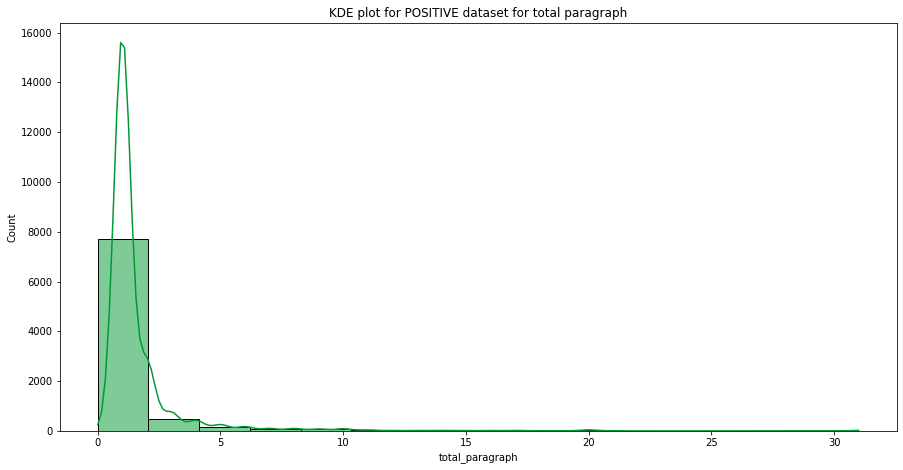

In [272]:
# Making histogram for the POSITIVE dataset distribution
fig, ax = plt.subplots(figsize=(15, 7.5))
sns.histplot(posset.total_paragraph,kde=True, color='#009933',ax=ax)
plt.title('KDE plot for POSITIVE dataset for total paragraph')
plt.show()

In [273]:
# Checking total number of rows in the dataframe
print(len(gbp))

23


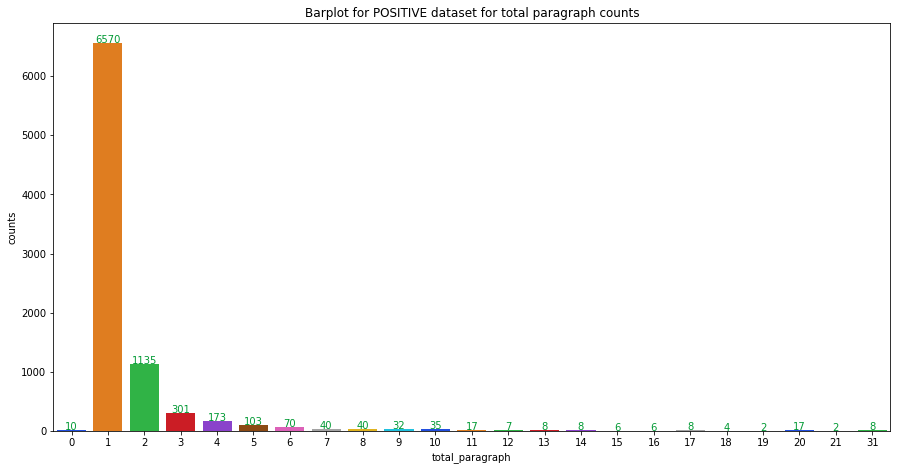

In [274]:
# Barchart for POSITIVE dataset
fig, ax = plt.subplots(figsize=(15, 7.5))
g = sns.barplot(x='total_paragraph', y='counts', palette="bright",data=gbp, ax=ax)
g.set_xticks(range(len(gbp)))
for index, row in gbp.iterrows():
    g.text(row.name,row.counts, round(row.counts), color='#009933', ha="center")

plt.title('Barplot for POSITIVE dataset for total paragraph counts')
plt.show()

In [275]:
gbn = negset.groupby(['total_paragraph']).size().reset_index(name='counts')
gbn.head()

,total_paragraph,counts
0,1,3587
1,2,11098
2,3,2
3,4,2
4,16,1


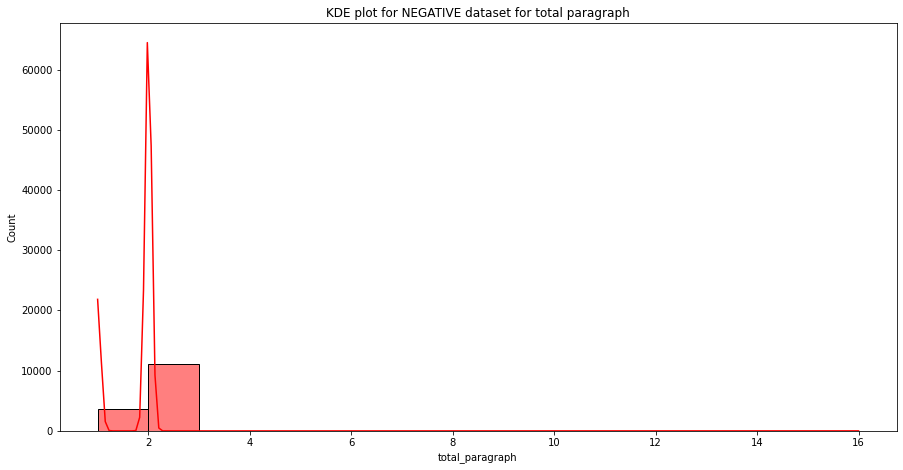

In [276]:
# Making histogram for the NEGATIVE dataset distribution
fig, ax = plt.subplots(figsize=(15, 7.5))
sns.histplot(negset.total_paragraph, kde=True, ax=ax, color='#ff0000')
plt.title('KDE plot for NEGATIVE dataset for total paragraph')
plt.show()

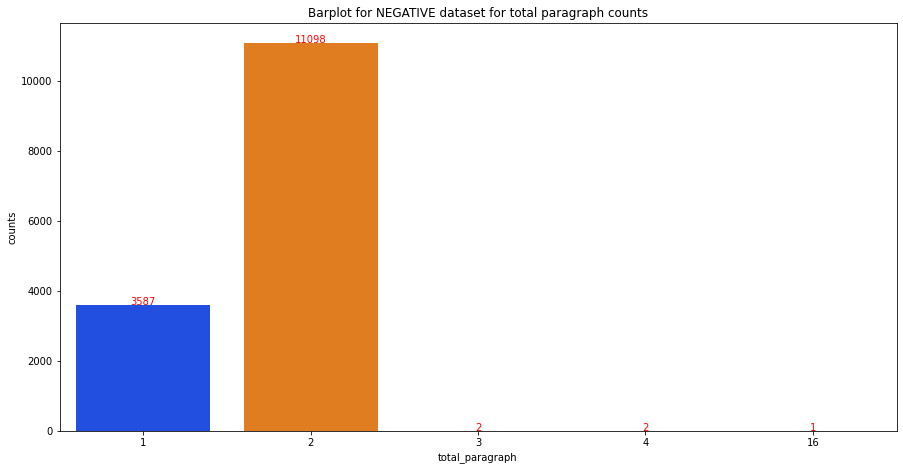

In [277]:
# Barchart for NEGATIVE dataset
fig, ax = plt.subplots(figsize=(15, 7.5))
g = sns.barplot(x='total_paragraph', y='counts', palette="bright",data=gbn, ax=ax)
g.set_xticks(range(len(gbn)))

for index, row in gbn.iterrows():
    g.text(row.name,row.counts, round(row.counts,2), color='#ff0000', ha="center")

plt.title('Barplot for NEGATIVE dataset for total paragraph counts')
plt.show()

In [278]:
gbneu = neutset.groupby(['total_paragraph']).size().reset_index(name='counts')
gbn.head()

,total_paragraph,counts
0,1,3587
1,2,11098
2,3,2
3,4,2
4,16,1


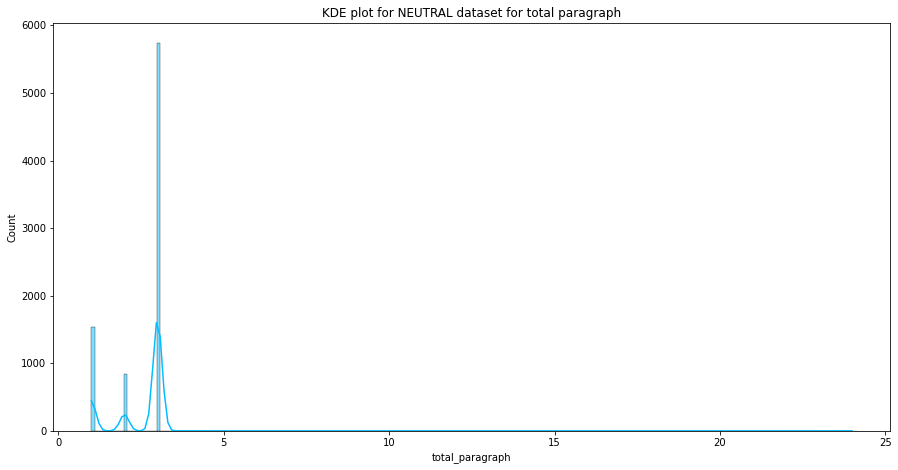

In [279]:
# Making histogram for the NEUTRAL dataset distribution
fig, ax = plt.subplots(figsize=(15, 7.5))
sns.histplot(neutset.total_paragraph, kde=True, ax=ax, color='#00bfff')
plt.title('KDE plot for NEUTRAL dataset for total paragraph')
plt.show()

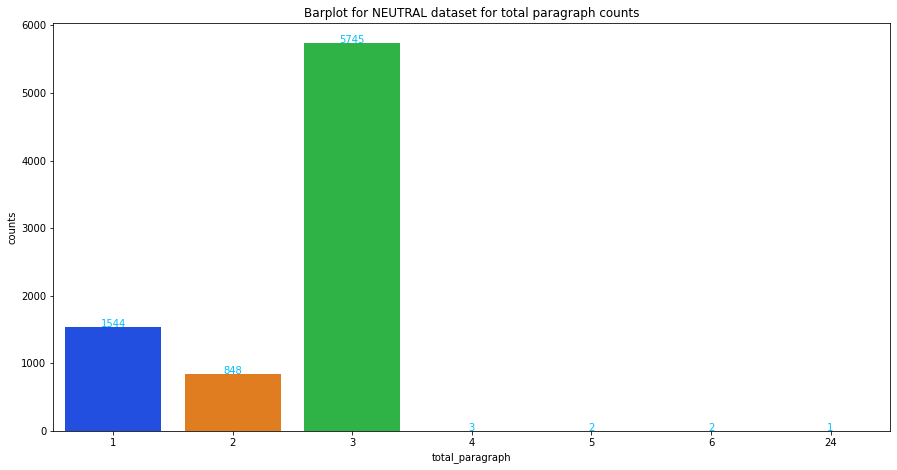

In [280]:
# Barchart for NEUTRAL dataset
fig, ax = plt.subplots(figsize=(15, 7.5))
g = sns.barplot(x='total_paragraph', y='counts', palette="bright",data=gbneu, ax=ax)
g.set_xticks(range(len(gbneu)))

for index, row in gbneu.iterrows():
    g.text(row.name,row.counts, round(row.counts,2), color='#00bfff', ha="center")

plt.title('Barplot for NEUTRAL dataset for total paragraph counts')
plt.show()

##### Title length distribution 

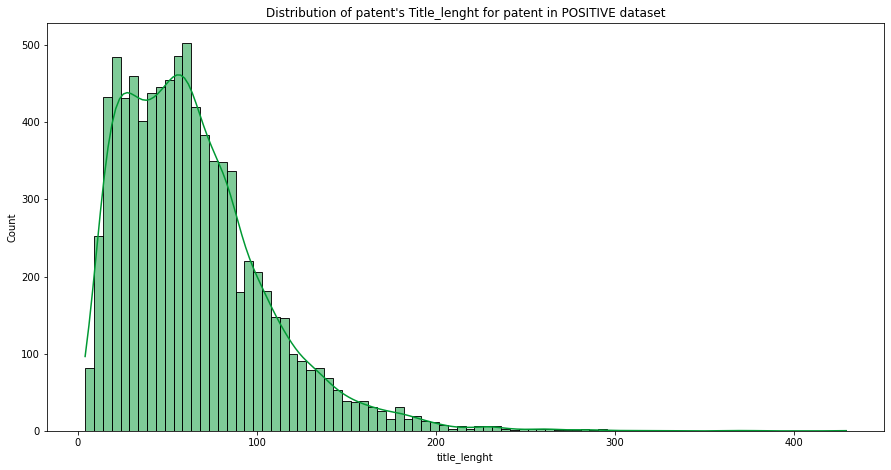

In [281]:
fig, ax = plt.subplots(figsize=(15, 7.5))
sns.histplot(posset.title_lenght, kde=True, ax=ax, color='#009933')
plt.title('Distribution of patent\'s Title_lenght for patent in POSITIVE dataset')
plt.show()

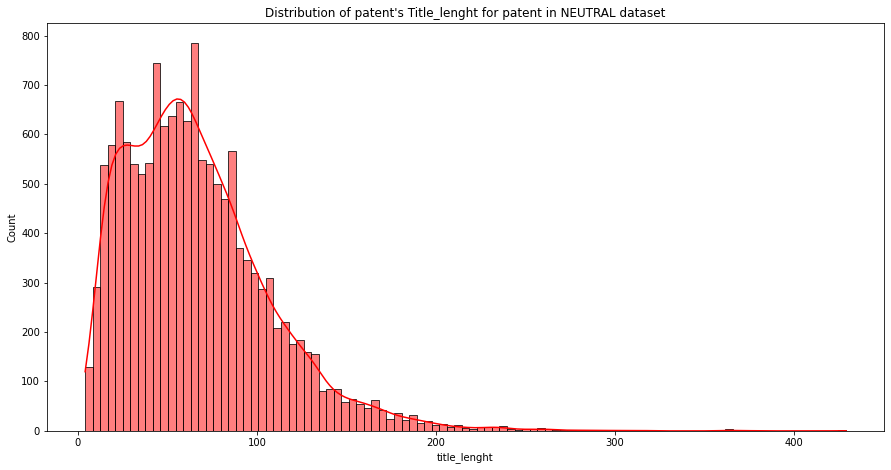

In [282]:
fig, ax = plt.subplots(figsize=(15, 7.5))
sns.histplot(negset.title_lenght, kde=True, ax=ax, color='#ff0000')
plt.title('Distribution of patent\'s Title_lenght for patent in NEUTRAL dataset')
plt.show()

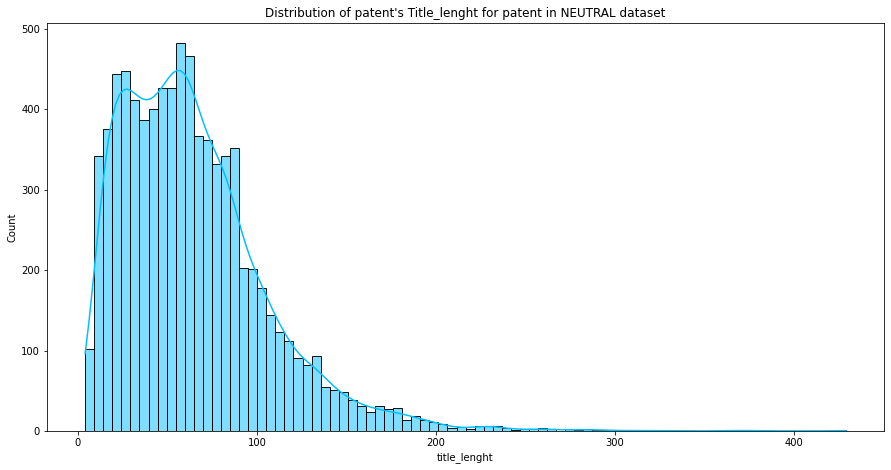

In [283]:
fig, ax = plt.subplots(figsize=(15, 7.5))
sns.histplot(neutset.title_lenght, kde=True, ax=ax, color='#00bfff')
plt.title('Distribution of patent\'s Title_lenght for patent in NEUTRAL dataset')
plt.show()

In [284]:
print(posset['total_words_in_title'].max())

54


##### Checking the relation between title length and words in it.

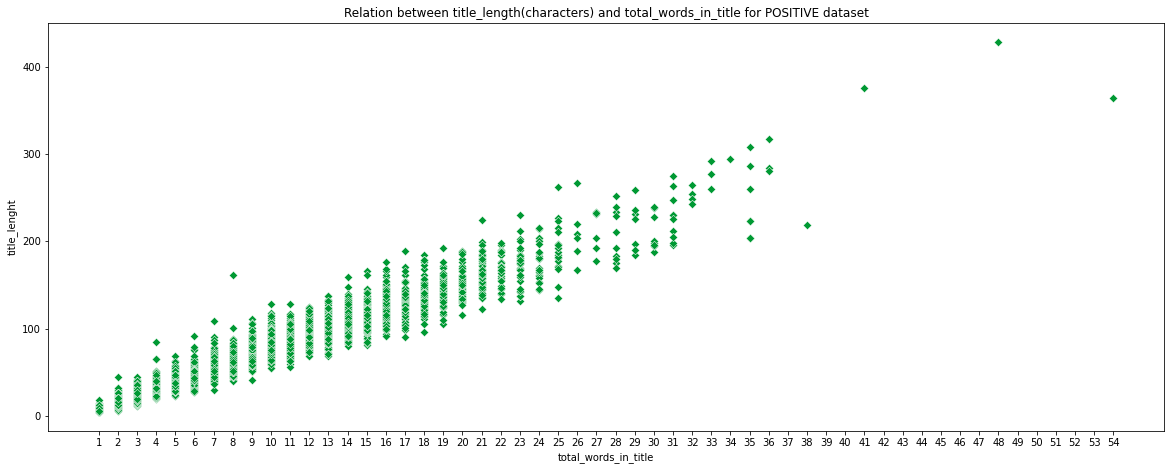

In [285]:
fig, ax = plt.subplots(figsize=(20, 7.5))
g = sns.scatterplot(x=posset.total_words_in_title,y=posset.title_lenght, marker= 'D', color='#009933')
g.set_xticks(range(1,(posset['total_words_in_title'].max())+1))
plt.title('Relation between title_length(characters) and total_words_in_title for POSITIVE dataset')
plt.show()


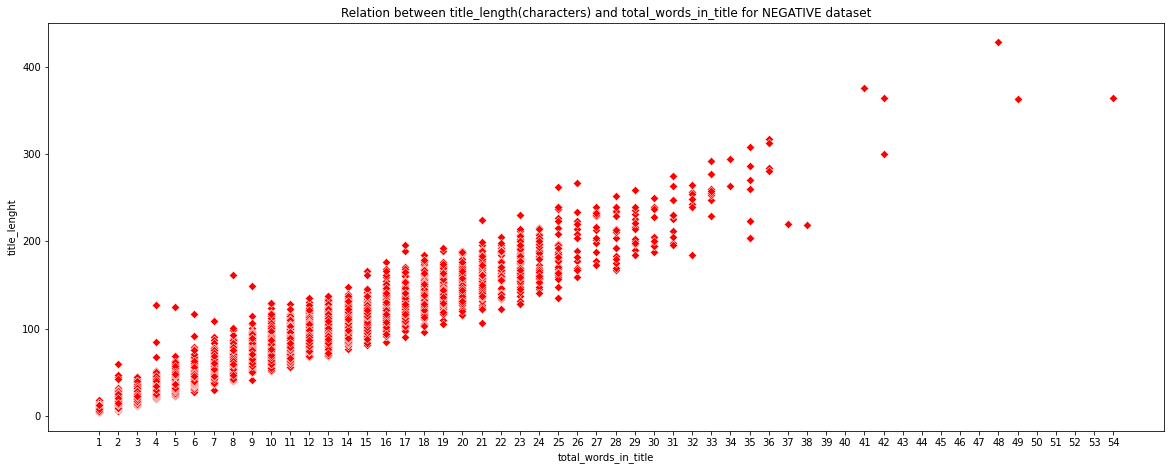

In [286]:
fig, ax = plt.subplots(figsize=(20, 7.5))
g = sns.scatterplot(x=negset.total_words_in_title,y=negset.title_lenght, marker= 'D', color='#ff0000')
g.set_xticks(range(1,(negset['total_words_in_title'].max())+1))
plt.title('Relation between title_length(characters) and total_words_in_title for NEGATIVE dataset')
plt.show()

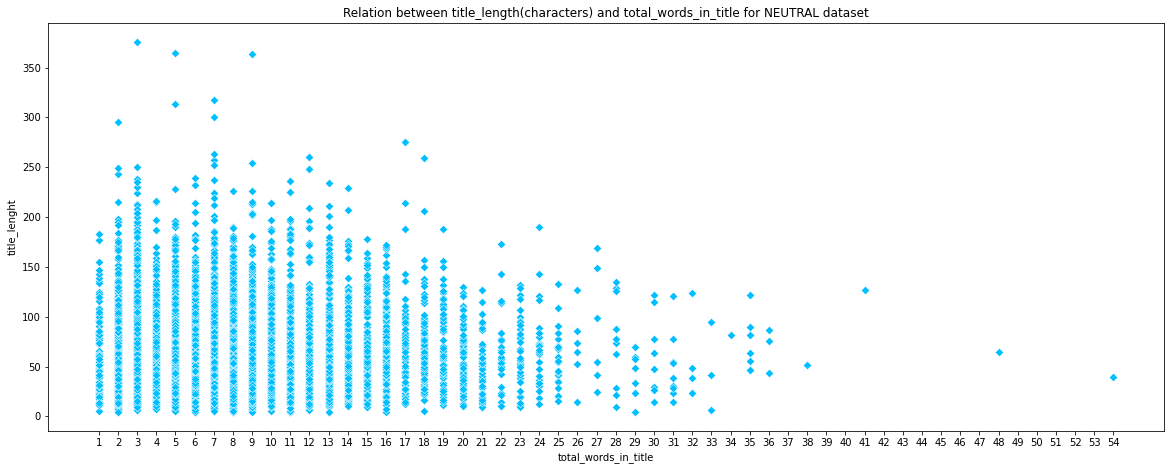

In [287]:
fig, ax = plt.subplots(figsize=(20, 7.5))
g = sns.scatterplot(x=neutset.total_words_in_title,y=negset.title_lenght, marker= 'D', color='#00bfff')
g.set_xticks(range(1,(posset['total_words_in_title'].max())+1))
plt.title('Relation between title_length(characters) and total_words_in_title for NEUTRAL dataset')
plt.show()

##### Checking realtionship between total poragraph and total words in it

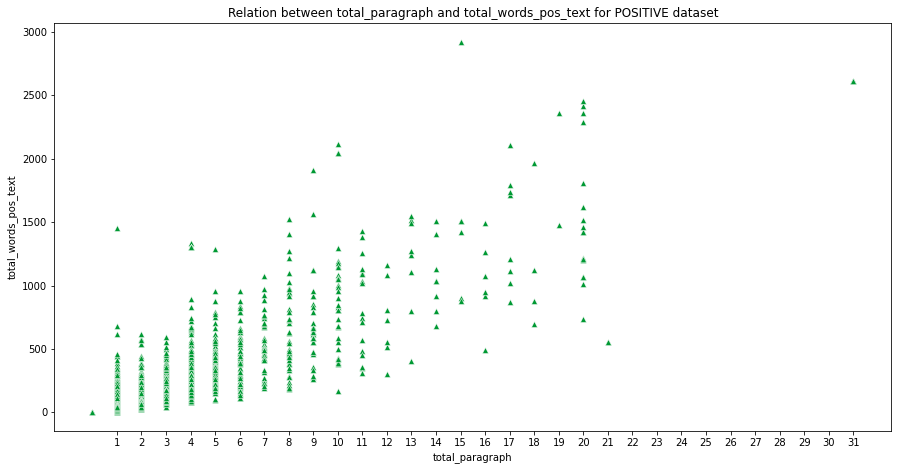

In [288]:
fig, ax = plt.subplots(figsize=(15, 7.5))
g = sns.scatterplot(x=posset.total_paragraph,y=posset.total_words_pos_text, marker= '^',color='#009933')
g.set_xticks(range(1,(posset['total_paragraph'].max())+1))
plt.title('Relation between total_paragraph and total_words_pos_text for POSITIVE dataset')
plt.show()

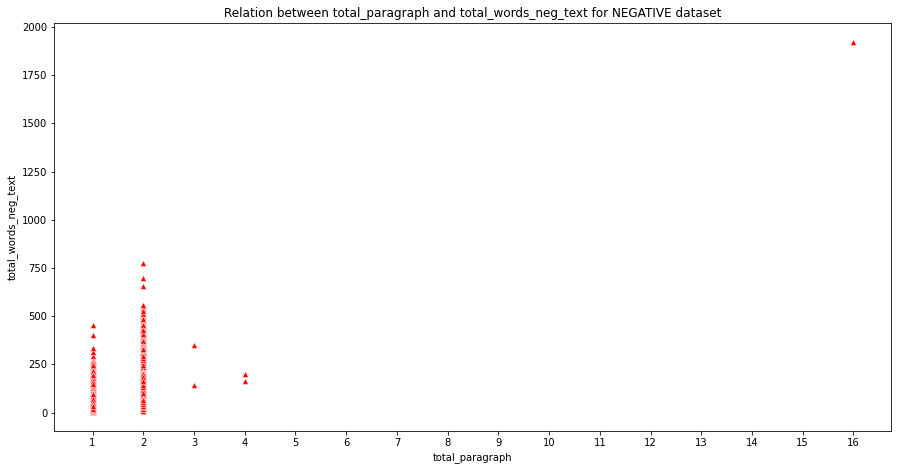

In [289]:
fig, ax = plt.subplots(figsize=(15, 7.5))
g = sns.scatterplot(x=negset.total_paragraph,y=negset.total_words_neg_text, marker= '^',color='#ff0000')
g.set_xticks(range(1,(negset['total_paragraph'].max())+1))
plt.title('Relation between total_paragraph and total_words_neg_text for NEGATIVE dataset')
plt.show()

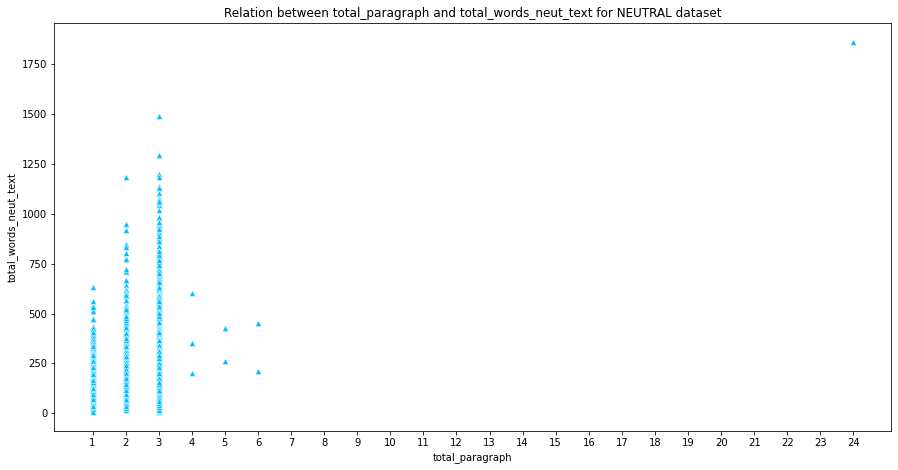

In [290]:
fig, ax = plt.subplots(figsize=(15, 7.5))
g = sns.scatterplot(x=neutset.total_paragraph,y=neutset.total_words_neut_text, marker= '^',color='#00bfff')
g.set_xticks(range(1,(neutset['total_paragraph'].max())+1))
plt.title('Relation between total_paragraph and total_words_neut_text for NEUTRAL dataset')
plt.show()

## Generated label dataset for year 2020

In [291]:
pos_stats = pd.read_csv('/content/gdrive/MyDrive/dataset_patent/2020_pos_stats.csv')
neg_stats = pd.read_csv('/content/gdrive/MyDrive/dataset_patent/2020_neg_stats.csv')
neut_stats = pd.read_csv('/content/gdrive/MyDrive/dataset_patent/2020_neutral_stats.csv')

In [292]:
pos_stats.head()

,Unnamed: 0,weekly_filename,total_publications,total_positive_samples
0,1,ipg200107.xml,7889,194
1,2,ipg200114.xml,5970,127
2,3,ipg200121.xml,6149,144
3,4,ipg200128.xml,6140,155
4,5,ipg200204.xml,7870,205


In [293]:
neg_stats.head()

,Unnamed: 0,weekly_filename,total_publications,total_negative_samples
0,1,ipg200107.xml,7889,317
1,2,ipg200114.xml,5970,214
2,3,ipg200121.xml,6149,241
3,4,ipg200128.xml,6140,250
4,5,ipg200204.xml,7870,307


In [294]:
neut_stats.head()

,Unnamed: 0,weekly_filename,total_publications,total_neutral_samples
0,1,ipg200107.xml,7889,244
1,2,ipg200114.xml,5970,157
2,3,ipg200121.xml,6149,175
3,4,ipg200128.xml,6140,182
4,5,ipg200204.xml,7870,233


In [295]:
# Dropping unnamed index from the tables 
dropUnnamedIndex(pos_stats)
dropUnnamedIndex(neg_stats)
dropUnnamedIndex(neut_stats)

In [296]:
# Sort the table and assign proper counter 
pos_stats = pos_stats.sort_values(by = ['weekly_filename'])
pos_stats.index = range(1, len(pos_stats)+1)

neg_stats = neg_stats.sort_values(by = ['weekly_filename'])
neg_stats.index = range(1, len(neg_stats)+1)

neut_stats = neut_stats.sort_values(by = ['weekly_filename'])
neut_stats.index = range(1, len(neut_stats)+1)


In [297]:
pos_stats.head()

,weekly_filename,total_publications,total_positive_samples
1,ipg200107.xml,7889,194
2,ipg200114.xml,5970,127
3,ipg200121.xml,6149,144
4,ipg200128.xml,6140,155
5,ipg200204.xml,7870,205


#### Creating a new dataframe having total publicaitons, positive samples, negative samples, and neutral samples month wise 

In [298]:
# Creating a dataframe
total_pnn_samples_per_month = pd.DataFrame(index=[str(i).zfill(2) for i in range(1, 13)], columns=['total_publications','pos_samples','neg_samples','neut_samples'])
total_pnn_samples_per_month.index.name = 'month'

In [299]:
# Creating a function, helping to calculate respective samples monthly using RegEx
def findTotlaPatentMonthly(dataframe_name, name):
  for i in range(1, 13):
    if (name == 'pos_stats'):
      gbm = pos_stats.groupby(dataframe_name['weekly_filename'].str.extract(r'(\w{3}\d{2}'+str(i).zfill(2)+'\d{2}\W\w{3})', expand=False))['total_positive_samples'].sum().reset_index()
      total_pnn_samples_per_month.loc[str(i).zfill(2),'pos_samples'] = gbm['total_positive_samples'].sum()
    elif (name == 'pos_stats_tp'):
      gbm = pos_stats.groupby(dataframe_name['weekly_filename'].str.extract(r'(\w{3}\d{2}'+str(i).zfill(2)+'\d{2}\W\w{3})', expand=False))['total_publications'].sum().reset_index()
      total_pnn_samples_per_month.loc[str(i).zfill(2),'total_publications'] = gbm['total_publications'].sum()
    elif (name == 'neg_stats'):
      gbm = dataframe_name.groupby(dataframe_name['weekly_filename'].str.extract(r'(\w{3}\d{2}'+str(i).zfill(2)+'\d{2}\W\w{3})', expand=False))['total_negative_samples'].sum().reset_index()
      total_pnn_samples_per_month.loc[str(i).zfill(2),'neg_samples'] = gbm['total_negative_samples'].sum()
    elif (name == 'neut_stats'):
      gbm = dataframe_name.groupby(dataframe_name['weekly_filename'].str.extract(r'(\w{3}\d{2}'+str(i).zfill(2)+'\d{2}\W\w{3})', expand=False))['total_neutral_samples'].sum().reset_index()
      total_pnn_samples_per_month.loc[str(i).zfill(2),'neut_samples'] = gbm['total_neutral_samples'].sum()


In [300]:
findTotlaPatentMonthly(pos_stats, 'pos_stats')
findTotlaPatentMonthly(pos_stats, 'pos_stats_tp')
findTotlaPatentMonthly(neg_stats, 'neg_stats')
findTotlaPatentMonthly(neut_stats, 'neut_stats')

In [301]:
# Insight of generated table
total_pnn_samples_per_month

,total_publications,pos_samples,neg_samples,neut_samples
month,,,,
01,26148,620,1022,758
02,29774,718,1176,874
03,37647,787,1422,985
04,31488,779,1335,960
05,27010,622,1082,769
06,37625,822,1435,1000
07,25693,607,1037,760
08,31506,732,1246,922
09,36839,843,1413,1021


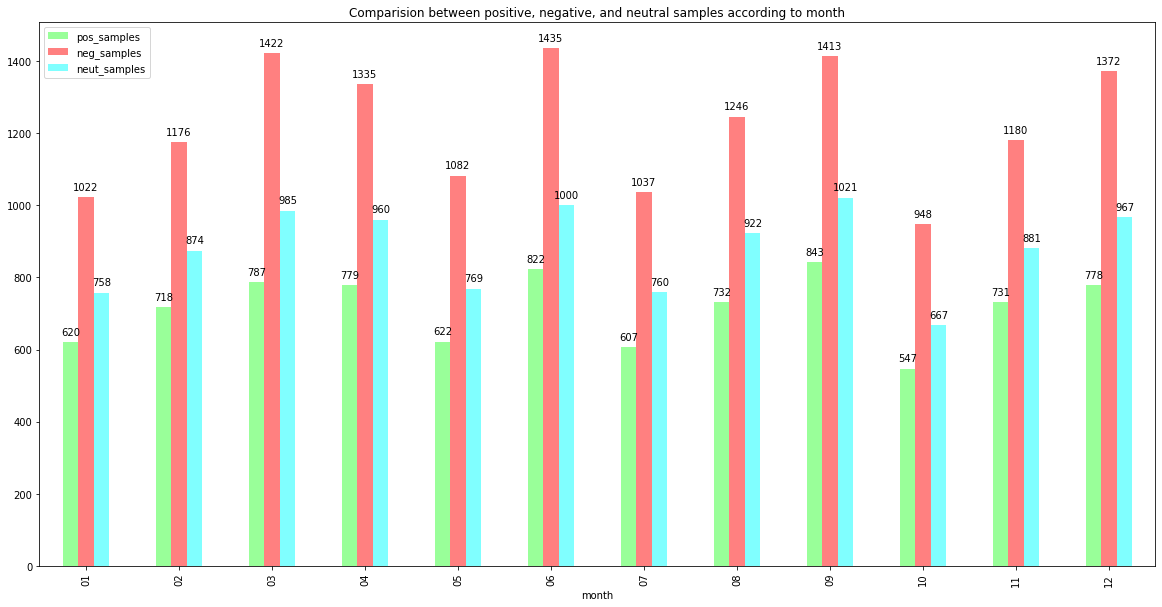

In [307]:
# Comparison between total number of pos, neg, and nutral samples 
ax = total_pnn_samples_per_month.iloc[0:,1:].plot(kind='bar', figsize=(20,10), title = 'Comparision between positive, negative, and neutral samples according to month', color=['#99ff99','#ff8080','#80ffff'])
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

### Generating csv files 

In [308]:
# csv files for respective tablse
posset.to_csv(path_or_buf='/content/gdrive/MyDrive/dataset_patent/2020_pos_fi.csv')
negset.to_csv(path_or_buf='/content/gdrive/MyDrive/dataset_patent/2020_neg_fi.csv')
neutset.to_csv(path_or_buf='/content/gdrive/MyDrive/dataset_patent/2020_neutral_fi.csv')

pos_stats.to_csv(path_or_buf='/content/gdrive/MyDrive/dataset_patent/2020_pos_stats.csv')
neg_stats.to_csv(path_or_buf='/content/gdrive/MyDrive/dataset_patent/2020_neg_stats.csv')
neut_stats.to_csv(path_or_buf='/content/gdrive/MyDrive/dataset_patent/2020_neutral_stats.csv')

total_pnn_samples_per_month.to_csv(path_or_buf='/content/gdrive/MyDrive/dataset_patent/2020_pnn_monthly_labels.csv')
